In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import gym

env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



**Wprowadzenie do środowiska "Taxi-v3"**

Celem gry taksówkowej jest upewnienie się, że taksówka dotrze do pasażera, zabierze go i dowiezie do miejsca zrzutu w najszybszy możliwy sposób.

**Reprezentacje**

*   | --> ŚCIANA (Nie może przejść, pozostanie w tej samej pozycji, jeśli spróbuje przejść przez ścianę)
*   Żółty --> Aktualna lokalizacja taksówki
*   Niebieski -> Lokalizacja odbioru
*   Fioletowy --> Miejsce odbioru
*   Zielony --> taksówka zmienia kolor na zielony po zabraniu pasażera
*   Litery --> Lokalizacje




In [ ]:
n_states = env.observation_space.n    # Całkowita liczba stanów w środowisku = 500 (0 to 499)
n_actions = env.action_space.n

**Dostępne akcje:**


* 0: jechać na południe
* 1: jechać na północ
* 2: jechać na wschód
* 3: jechać na zachód
* 4: zabieranie pasażerów
* 5: wysadzić pasażerów

In [ ]:
states = list(range(env.observation_space.n))
actions = list(range(env.action_space.n))

In [ ]:
def initialize_policy(n_states, n_actions):
  
    policy = np.zeros(shape=(n_states, n_actions)) +  1/n_actions
    
    return policy

In [ ]:
policy = initialize_policy(n_states, n_actions)
gamma = 0.8
theta = 0.00001
V = np.zeros(n_states)
Q = np.zeros([n_states, n_actions])

W każdym kroku agent wybiera akcję, a środowisko zwraca obserwację i nagrodę. 

Zwrócone 4 elementy są:

**Observation (obserwacja):** Stan, reprezentujący obserwację środowiska.

**Reward (nagroda):** Nagroda uzyskana za poprzednią akcję.

* +20: Ostatni krok, kiedy pomyślnie odbierzemy pasażera i wysadzimy go w wybranym miejscu

* -1: na każdym kroku, kiedy agent próbuje znaleźć jak najszybsze rozwiązanie

* -10: za każdym razem, gdy  taksówka nieprawidłowo odbiera lub pozostawia pasażera

**Done:** wskazuje stan działań (False/True)

In [ ]:
def policy_evaluation(env, policy, gamma, theta = 0.00001):
  V = np.zeros(n_states)
  delta = float('inf')

  while delta > theta:
        
      delta = 0
        
      for s in states:           
          v = 0
          for a, p_a in enumerate(policy[s]):
              for p, s_, r, done in env.P[s][a]: 
                  v += p_a * p * (r + gamma * V[s_])
                    
          delta = max(delta, abs(v - V[s]))
            
          V[s] = v
        
  return V

In [ ]:
def q_function(env, V, s, gamma):
    q = np.zeros(n_actions)
         
    for a in actions:
        for p, s_, r, done in env.P[s][a]:
            q[a] += p * (r + gamma * V[s_])
    
    return q

**Policy Iteration (Iteracja polityki)** --> Algorytm na każdym kroku definiuje i ulepsza politykę, a następnie oblicza wartość zgodnie z nową, aż do zbieżności polityki.

In [ ]:
def policy_iteration(env, gamma=1.0):
    policy = initialize_policy(n_states, n_actions)
    policy_stable = False

    while not policy_stable:
        V = policy_evaluation(env, policy, gamma)
        policy_stable = True

        for s in states:
            a_old = np.argmax(policy[s])
            q = q_function(env, V, s, gamma)
            a = np.argmax(q)
            if a_old != a:
                policy_stable = False
                
            policy[s] = np.eye(n_actions)[a]                     

    return policy, V

In [ ]:
policy_pi, V_pi = policy_iteration(env, gamma)  

In [ ]:
policy_pi

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

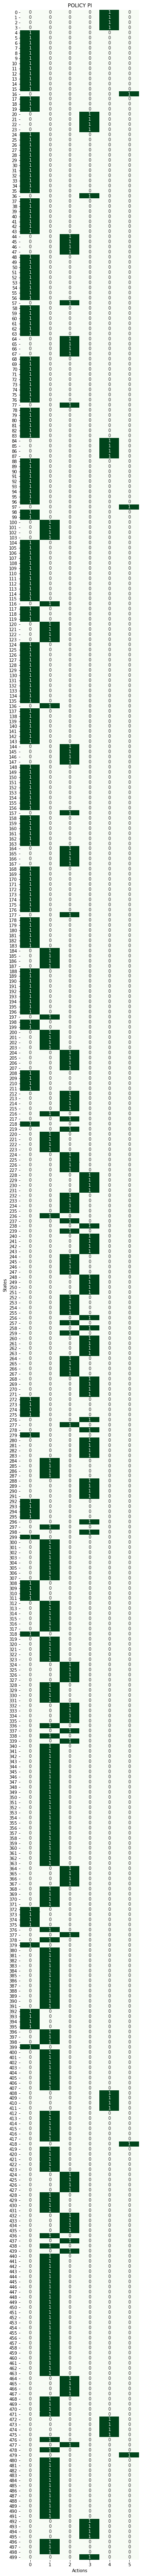

In [ ]:
plt.figure(figsize=(5, 110))
sns.heatmap(policy_pi, cmap="Greens", annot=True, cbar=False)
plt.title("POLICY PI")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

<function matplotlib.pyplot.show>

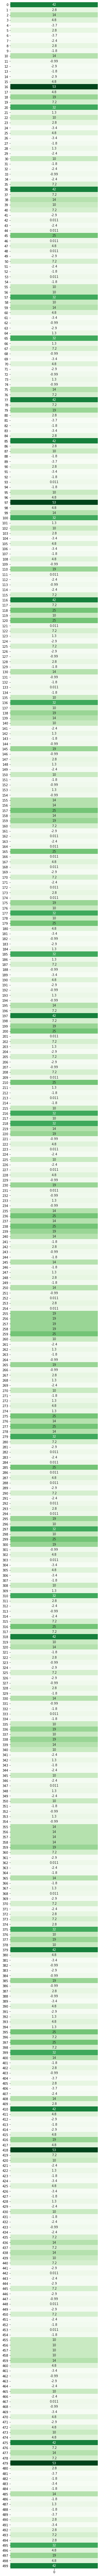

In [ ]:
plt.figure(figsize=(5, 150))
sns.heatmap(V_pi.reshape(500, 1), cmap="Greens", annot=True, cbar=False)
plt.show

In [ ]:
total_reward = 0.
observation = env.reset()

for t in range(30):

  action = np.argmax(policy_pi[observation])
  
  new_observation, reward, done, info = env.step(action)

  observation = new_observation

  total_reward += reward
  
  print("Liczba iteracji {}| pozycja {}| nagroda {}| spełnioność {}".format(t, observation, total_reward, done))
  env.render()
  
  if done:
    break

  

Liczba iteracji 0| pozycja 352| nagroda -1.0| spełnioność False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Liczba iteracji 1| pozycja 252| nagroda -2.0| spełnioność False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Liczba iteracji 2| pozycja 272| nagroda -3.0| spełnioność False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Liczba iteracji 3| pozycja 372| nagroda -4.0| spełnioność False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Liczba iteracji 4| pozycja 472| nagroda -5.0| spełnioność False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Liczba iteracji 5| pozycja 476| nagroda -6.0| spełnioność False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Liczba iteracji 6| pozycja 376| nagroda -7.0| spełni

**Podsumowanie**


Udało nam się rozwiązać problem według dokumentacji OpenAI Gym, czyli osiągnąć celu zgodnego z zadaniem Taxi-v3.